In [2]:
import pandas as pd
from collections import Counter
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
st_path = '/goofys/Samples/10X/human_heart/visium-OCT_LV_lognormalised.h5ad'
st_path = '/goofys/Samples/10X/human_heart/visium-OCT_RV_lognormalised.h5ad'
st_path = '/goofys/Samples/10X/human_heart/visium-OCT_LA_lognormalised.h5ad'
st_path = '/goofys/Samples/10X/human_heart/visium-OCT_RA_lognormalised.h5ad'
st_path = '../visium-OCT_RA_lognormalised_ssi_KLD.h5ad'
st_path = '../visium-OCT_SAN_lognormalised_ssi_KLD.h5ad'  # 77 Neurons, 253 nerve
st_path = '../visium-FFPE_SAN_lognormalised_ssi_KLD.h5ad'
st_path = '/goofys/Samples/10X/human_myocardial_infarction/Visium_control_P7.h5ad'
st_path = '../Visium_control_P7_ssi_KLD_heartcellatlas.h5ad'
st_path = '../Visium_control_P7_ssi_KLD.h5ad'

In [34]:
st_paths = ["/goofys/Samples/Stereo_seq/Mouse_brain/SS200000141TL_B5_pruned_inplace.h5ad",
            "/goofys/Samples/Stereo_seq/E16.5_E1S3_cell_bin_whole_brain_noborderct_unlog1p_pruned_inplace.h5ad",
            "/goofys/Samples/10X/mouse_brain_visium_cell2location_pruned_inplace.h5ad",
            "/goofys/Samples/slide_seq/cellxgene_kidney_slide_seq_v2/Puck_191223_19_corr_pruned_inplace.h5ad"]
sc_annotations = ["cell_subclass", "cell_subclass", "annotation_1" ,"clusters"]

ds_names = ['Adult mouse brain', 'Whole mouse embryo brain', 'Visium mouse brain', 'Mouse kidney']

In [3]:
adata_st = sc.read_h5ad("/goofys/Samples/Stereo_seq/E16.5_E1S3_cell_bin_whole_brain_noborderct_unlog1p_pruned_inplace.h5ad")
adata_st

AnnData object with n_obs × n_vars = 59704 × 20209
    obs: 'sim anno'
    obsm: 'spatial'

In [61]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisation
def plot_spatial(
    adata, annotation, ax: Axes, spot_size: float, palette=None, title: str = ""
):
    """
    Scatter plot in spatial coordinates.

    Parameters:
        - adata (AnnData): Annotated data object which represents the sample
        - annotation (str): adata.obs column used for grouping
        - ax (Axes): Axes object used for plotting
        - spot_size (int): Size of the dot that represents a cell. We are passing it as a diameter of the spot, while
                the plotting library uses radius therefore it is multiplied by 0.5
        - palette (dict): Dictionary that represents a mapping between annotation categories and colors
        - title (str): Title of the figure

    """
    s = spot_size * 0.5
    data = adata

    ax = sns.scatterplot(
        data=data.obs,
        hue=annotation,
        x=data.obsm["spatial"][:, 0],
        y=data.obsm["spatial"][:, 1],
        ax=ax,
        s=s,
        linewidth=0,
        palette=palette,
        marker=".",
        legend=False
    )
    # ax.invert_yaxis()
    ax.set(yticklabels=[], xticklabels=[])
    ax.set_title(title, fontsize=22, loc='left')
    ax.tick_params(bottom=False, left=False)
    ax.set_aspect("equal")
    sns.despine(bottom=True, left=True, ax=ax)

In [12]:
adata_st.obs_names_make_unique()
adata_st.var_names_make_unique()

In [14]:
adata_st.var
# np.ravel(st_adata[:, 'Jarid2'].X.toarray())

""
Tpm4
Jarid2
Cmss1
Pfdn5
Nedd8
...
Gm20824
Usp9y
Zfy1
Gm28252


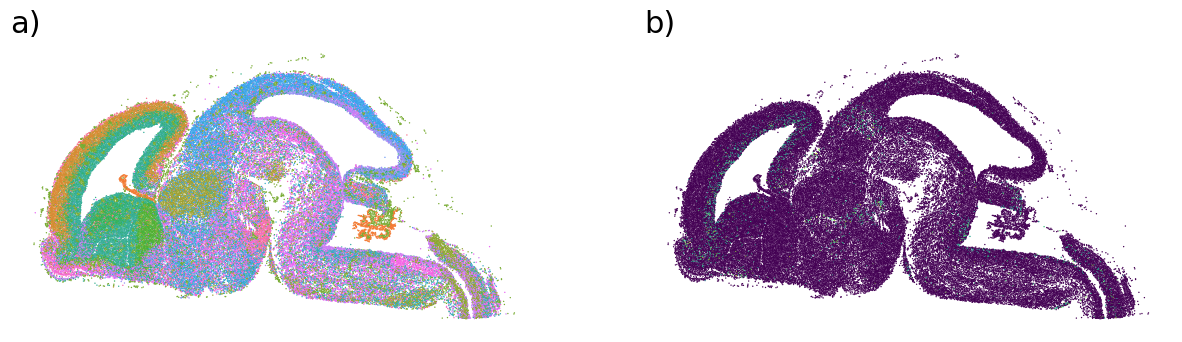

In [62]:
# fig, ax = plt.subplots(figsize=(15, 15))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
plot_spatial(
        adata_st,
        annotation=adata_st.obs['sim anno'],
        spot_size=8,
        ax=ax[0],
        title="a)"
    )

plot_spatial(
        adata_st,
        annotation=np.log1p(np.ravel(adata_st[:, 'Pax6'].X.toarray())),
        spot_size=8,
        ax=ax[1],
        title="b)",
        palette=sns.color_palette("viridis", as_cmap=True)
    )

plt.savefig('figs/stplot.png', dpi=300, bbox_inches='tight')